### We study the instantaneous velocities of the participants, by obtaining the probability density function (pdf) and fitting it with a Log-Normal distribution. We can take the logarithm of the velocities (scaled with $<v>$ for units) and then we can fit the pdf with a Normal distribution. We also show that rescaling all the individual velocity vectors, all individual pdfs collapse into a single one with zero mean and unit variance (same behaviour).  

### We also study the velocity considering the moving average and the moving average mobile

### Finally, we interpolate the data in order to have all the GPS locations separated by one second (so all temporal gaps are $\Delta t =1s$), and we compare with the original processed data. 

# INDEX

    1. PDF Velocities. Original Data
        1.1. Using v. Fit with Log-Normal distribution
        1.2. Using u. Fit with Normal distribution
        
    2. Individual PDF. Rescaling
    
    3. Moving average
    
    4. Moving average mobile
    
    5. Linear interpolation
        5.1. Pdf velocities comparision
        5.2. Individual PDF interpolated data
        
        
    

# 1. PDF Velocities. Original Data

In [2]:
import networkx as nx
import osmnx as ox
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import glob
import os
from math import sin, cos, sqrt, atan2, radians
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy.optimize import curve_fit

#%matplotlib inline
ox.config(log_console=True)
ox.__version__


# Color blind library
plt.style.use('tableau-colorblind10')          
plt.style.library['tableau-colorblind10']


# Haversine formula for distance between GPS locations
def getDistanceFromLatLonInM(lat1,lon1,lat2,lon2):
    """ Function that returns the distance in metres between 2 GPS locations in degrees (latitude and longitude).
    It is based in the Haversine formula (https://en.wikipedia.org/wiki/Haversine_formula) which takes into account the
    Earth's curvature. 
    
    Input:
        - 2 GPS coordinates: (latitude1,longitude1) of the first point and (latitude2,longitude2) of the second point. 
        
    Output:
        - Distance in metres between the two GPS locations.
    """
    
    R = 6371 # Radius of the earth in km
    dLat = radians(lat2-lat1)
    dLon = radians(lon2-lon1)
    rLat1 = radians(lat1)
    rLat2 = radians(lat2)
    a = sin(dLat/2) * sin(dLat/2) + cos(rLat1) * cos(rLat2) * sin(dLon/2) * sin(dLon/2) 
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    d = R * c # Distance in km
    e= d*1000 #distance in m
    
    return e


# Log-Normal distribution with parameters v0 and sigma
def lognormal(x,sigmag,v0):
    'Log-Normal distribution with inputs: sigma (standard deviation) and v0 (mean value)'
    return (1./(sigmag*np.sqrt(2*math.pi)*x))*np.exp(-(np.power((np.log(x/v0)),2)/(2*np.power(sigmag,2))))


# Normal distribution with parametres mu and sigma
def normal(x,sigmag,mu):
    'Normal (or Gaussian) distribution with parameters sigma (standard deviation) and mu (mean value)'
    return (1./(sigmag*np.sqrt(2*math.pi)))*np.exp(-(np.power((x-mu),2)/(2*np.power(sigmag,2))))


## 1.1. Using v. Fit with Log-Normal distribution

$ \Large p(v)= \frac{1}{v\sqrt{2\pi \sigma^{2}}} e^{\left[-\frac{\left( \ln{\left(v/v_{o} \right)} \right)^{2}}{2\sigma^{2}} \right]}$




<v>= 1.5219009997850155  std= 0.7523192312888836  e= 0.003964630007391514
min v= 0.0057567082772639  max v= 8.566491492517326
q1 (25%): 1.0693516215124534
q2 (50%): 1.436049109870504
q3 (75%): 1.8501581295809548

----------------------------------------------------------------------

FIT PARAMETERS
v0= 1.5074841440756204 +- 0.006571826462383969
sigma= 0.3911785144603298 +- 0.0037456896286422337


<ipython-input-4-cf400a74399f>:44: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_yscale('log',basey=10)
<ipython-input-4-cf400a74399f>:45: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_xscale('log',basex=10)


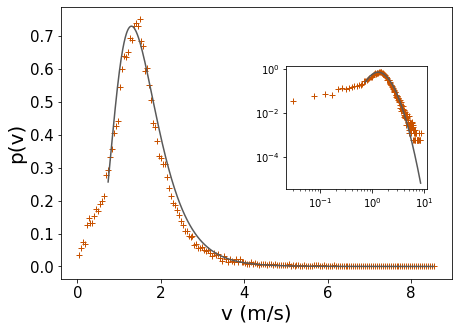

In [4]:
# We loop over all the .csv processed files and then we store all velocity vectors into a single list.
all_files = glob.glob(os.path.join("*.csv")) # Make list of paths (csv files for all individuals)

velocities=[] 
for file in all_files:   # Loop over all csv files in the folder/directory   
    df = pd.read_csv(file)  # Read the csv file of each user
    df2=df.copy() 
    v=df2['v'][:-1].tolist()   # List of velocities and (we remove the last element which is NaN)
    velocities.extend(v)      # We put the velocities of all users in a unique list (no moving average)
        

# Mean, standard deviation, standard error and quantiles.
mean = sum(velocities) / len(velocities)
variance = sum([((x - mean) ** 2) for x in velocities]) / len(velocities)
res = variance ** 0.5
error=res/(len(velocities)**0.5)
q1=np.quantile(velocities, 0.25)
q2=np.quantile(velocities, 0.50)
q3=np.quantile(velocities, 0.75)
print('<v>=',mean, '', 'std=',res, '', 'e=',error)
print('min v=',min(velocities),'', 'max v=',max(velocities))
print('q1 (25%):',q1)
print('q2 (50%):',q2)
print('q3 (75%):',q3)

print('')
print('----------------------------------------------------------------------')
print('')



# Probability density function. Log-Normal fit

fig, ax = plt.subplots(figsize=(7,5)) 
axins2 = inset_axes(ax, width="80%", height="100%", loc=1,bbox_to_anchor=(0.50,1-0.65,.45,.45), bbox_transform=ax.transAxes)

numpy_matrix = np.array(velocities)  #list to array
counts,bin_edges = np.histogram(numpy_matrix,bins='auto',density=True)   #frequences and bins
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.   #bins center
ax.plot(bin_centres, counts, '+',c='#C85200')    #plot pdf
axins2.plot(bin_centres, counts, '+', c='#C85200')    #plot pdf
ax.set_xlabel('v (m/s)',fontsize=20)
ax.set_ylabel('p(v)',fontsize=20)
axins2.set_yscale('log',basey=10)
axins2.set_xscale('log',basex=10)
ax.tick_params(labelsize=15)


#LOG-NORMAL FIT. 
# We fit from the bin 15 to the end since we note that for velocities < than ~1.7m/s the distribution does not fill well
# maybe due to GPS error which affects small velocities?

popt, pcov = curve_fit(lognormal, bin_centres[15:], counts[15:], p0=(1,1))  # We fit from the bin 15 to the end
times = np.arange(bin_centres[15], bin_centres[-1], 0.01)
model = lognormal(times, *popt)
perr = np.sqrt(np.diag(pcov))  # error of the fit
ax.plot(times, model, '-',label='fit', c='#595959')
axins2.plot(times, model, '-', label='fit', c='#595959')

print('FIT PARAMETERS')
print('v0=', popt[1], '+-', perr[1])
print('sigma=', popt[0], '+-', perr[0])

# Save figure
#fig.savefig('pdf_v.pdf',format='pdf', bbox_inches='tight')

plt.show()   





## 1.2. Using u. Fit with Normal distribution

$ u=\ln \left( \frac{v}{\langle v \rangle} \right)$



$ \Large p(v)= \frac{1}{\sqrt{2\pi \sigma_{u}^{2}}} e^{\left[-\frac{\left( u-\mu_{u} \right)^{2}}{2\sigma_{u}^{2}} \right]}$

<ipython-input-7-b58d5b06981b>:33: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_yscale('log',basey=10)
<ipython-input-7-b58d5b06981b>:34: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_xscale('log',basex=10)


FIT PARAMETERS
mu= -0.01214869489815447 +- 0.006186397766482012
sigma= 0.35850308577005563 +- 0.005120936430384332


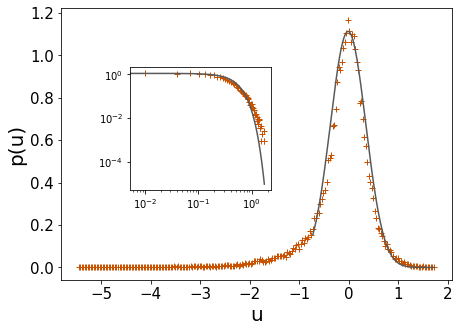

In [7]:
# We loop over all the .csv processed files and then we store all velocity vectors into a single list.
all_files = glob.glob(os.path.join("*.csv")) # Make list of paths (csv files for all individuals)

velocities=[] 
u=[]
for file in all_files:   # Loop over all csv files in the folder/directory   
    df = pd.read_csv(file)  # Read the csv file of each user
    df2=df.copy() 
    v=df2['v'][:-1].tolist()   # List of velocities (we remove the last element which is NaN)
    velocities.extend(v)      # We put the velocities of all users in a unique list (no moving average)
    
    
    # We create a new list with the logarithm of v.  u=ln(v/<v>). We scale each individual velocity vector with <v> for units
    v_log=[]
    mean_v=sum(v)/len(v)        
    for i in range(len(v)):
        v_log.append(np.log(v[i]/mean_v))
        
    u.extend(v_log)
        

# Plot probability density function (pdf) of u and fit with Normal (Gaussian) distribution
fig, ax = plt.subplots(figsize=(7,5)) 
axins2 = inset_axes(ax, width="80%", height="100%", loc=1,bbox_to_anchor=(0.10,1-0.65,.45,.45), bbox_transform=ax.transAxes)

numpy_matrix = np.array(u)  #list to array
counts,bin_edges = np.histogram(numpy_matrix,bins='auto',density=True)   #frequences and bins
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.   #bins center
ax.plot(bin_centres, counts, '+', c='#C85200')    #plot pdf
axins2.plot(bin_centres, counts, '+', c='#C85200')    #plot pdf
ax.set_xlabel('u',fontsize=20)
ax.set_ylabel('p(u)',fontsize=20)
axins2.set_yscale('log',basey=10)
axins2.set_xscale('log',basex=10)
ax.tick_params(labelsize=15)


# NORMAL FIT. Again, we fit from the equivalent bin_centre corresponding to ~1.7m/s in p(v). 
popt, pcov = curve_fit(normal, bin_centres[155:], counts[155:], p0=(1,1))   
times = np.arange(bin_centres[155], bin_centres[-1], 0.01)
model = normal(times, *popt)
perr = np.sqrt(np.diag(pcov))  # error of the fit parametres
ax.plot(times, model, '-',c='#595959')
axins2.plot(times, model, '-', c='#595959')

print('FIT PARAMETERS')
print('mu=', popt[1], '+-', perr[1])
print('sigma=', popt[0], '+-', perr[0])

# Save figure
#fig.savefig('pdf_u.pdf',format='pdf', bbox_inches='tight')

plt.show() 


# 2. Individual PDF. Rescaling

We rescale the vector of velocities of each individual to have zero mean and unit variance and then represent all the PDFs in order to see if they colapse into a single pdf. This procedure is done to check whether all participants have the same log-Normal behaviour.

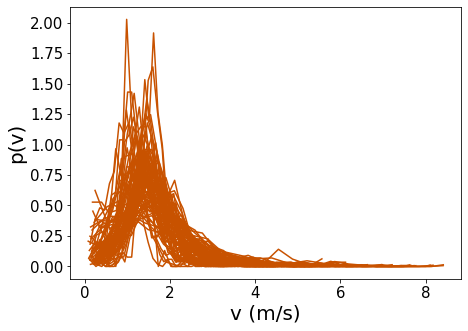

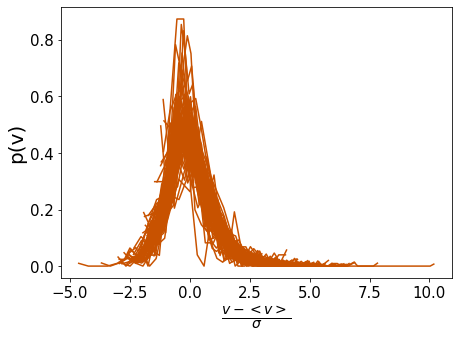

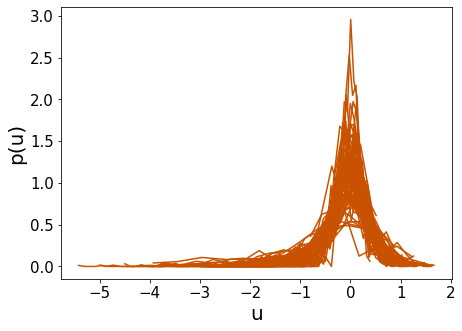

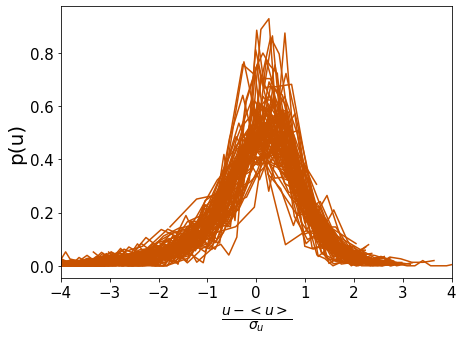

In [10]:
all_files = glob.glob(os.path.join("*.csv")) # Make list of paths (csv files for all individuals)


fig, ax = plt.subplots(figsize=(7,5)) 
fig2, ax2 = plt.subplots(figsize=(7,5)) 
fig3, ax3 = plt.subplots(figsize=(7,5)) 
fig4, ax4 = plt.subplots(figsize=(7,5)) 
#axins2 = inset_axes(ax, width="80%", height="100%", loc=1,bbox_to_anchor=(0.50,1-0.55,.45,.45), bbox_transform=ax.transAxes)

for file in all_files:   # Loop over all csv files in the folder/directory 
    df = pd.read_csv(file)  # Read the csv file of each user
    df2=df.copy() 
    v=df2['v'][:-1].tolist()   # List of velocities (we remove the last element which is NaN)
    
    # Rescaling velocities. For each vector, we rescale the velocity vector v as:  v_new(i)= [v(i)-<v>] / std(v)
    # The logarithm of the velocity  u=ln(v/<v>) is also stored in a list
    mean=sum(v)/len(v)
    variance = sum([((x- mean) ** 2) for x in v]) / len(v)  # Mean and std 
    std = variance ** 0.5
    
    v2=[]
    u=[]
    for i in range(len(v)):
        v2.append((v[i]-mean)/std)
        u.append(np.log(v[i]/mean))
       
    # We also rescale u, the vector of the logarithm of v. 
    u2=[]
    mean_u=sum(u)/len(u)
    variance_u = sum([((x_u- mean_u) ** 2) for x_u in u]) / len(u)
    std_u = variance_u ** 0.5
    for ii in range(len(u)):
        u2.append((u[ii]-mean_u)/std_u)       
    

    # Plot the individual PDF in four cases:
    #   1. Individual pdf of v without rescaling
    #   2. Individual pdf of v rescaled to have zero mean and unit variance
    #   3. Individual pdf of u without rescaling
    #   4. Individual pdf of u rescaled to have zero mean and unit variance
    
    numpy_matrix = np.array(v)  #list to array
    counts,bin_edges = np.histogram(numpy_matrix,'auto',density=True)   #frequences and bins
    bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.   #bins center
    ax.plot(bin_centres, counts, '-',  c='#C85200')    #plot pdf
    
    numpy_matrix2 = np.array(v2)  #list to array
    counts2,bin_edges2 = np.histogram(numpy_matrix2,'auto',density=True)   #frequences and bins
    bin_centres2 = (bin_edges2[:-1] + bin_edges2[1:])/2.   #bins center
    ax2.plot(bin_centres2, counts2, '-',  c='#C85200')    #plot pdf
    
    numpy_matrix3 = np.array(u)  #list to array
    counts3,bin_edges3 = np.histogram(numpy_matrix3,'auto',density=True)   #frequences and bins
    bin_centres3 = (bin_edges3[:-1] + bin_edges3[1:])/2.   #bins center
    ax3.plot(bin_centres3, counts3, '-',  c='#C85200')    #plot pdf
    
    numpy_matrix4 = np.array(u2)  #list to array
    counts4,bin_edges4 = np.histogram(numpy_matrix4,'auto',density=True)   #frequences and bins
    bin_centres4 = (bin_edges4[:-1] + bin_edges4[1:])/2.   #bins center
    ax4.plot(bin_centres4, counts4, '-',  c='#C85200')    #plot pdf
    
    
ax.set_xlabel('v (m/s)',fontsize=20)
ax.set_ylabel('p(v)',fontsize=20)
ax.tick_params(labelsize=15)


ax2.set_xlabel(r'$\frac{v-<v>}{\sigma}$',fontsize=20)
ax2.set_ylabel('p(v)',fontsize=20)
ax2.tick_params(labelsize=15)

ax3.set_xlabel('u',fontsize=20)
ax3.set_ylabel('p(u)',fontsize=20)
ax3.tick_params(labelsize=15)

ax4.set_xlabel(r'$\frac{u-<u>}{\sigma_u}$',fontsize=20)
ax4.set_ylabel('p(u)',fontsize=20)
ax4.tick_params(labelsize=15)
ax4.set_xlim(-4,4)

#fig.savefig('individual_pdf_v.pdf',format='pdf', bbox_inches='tight')
#fig2.savefig('individual_pdf_v_rescaled.pdf',format='pdf', bbox_inches='tight')
#fig3.savefig('individual_pdf_u.pdf',format='pdf', bbox_inches='tight')
#fig4.savefig('individual_pdf_u_rescaled.pdf',format='pdf', bbox_inches='tight')

plt.show()   

# 3. Moving average 

Average every "s" velocities.

For s=2:

$v= \left[ \frac{v_{0}+v_{1}}{2} , \frac{v_{1}+v_{2}}{2}, ...., \frac{v_{N-1}+v_{N}}{2} \right]$

No moving average
<v>= 1.5219009997850155  std= 0.7523192312888836  e= 0.003964630007391514
min v= 0.0057567082772639  max v= 8.566491492517326
36008
q1 (25%): 1.0693516215124534
q2 (50%): 1.436049109870504
q3 (75%): 1.8501581295809548

Moving average every 2 velocities
<v>= 1.522301635547103  std= 0.6782780824846822  e= 0.003578568998935453
min v= 0.02028872191129975  max v= 7.578418600825395
35925
q1 (25%): 1.1109404941813854
q2 (50%): 1.4484177385085228
q3 (75%): 1.8280605956250906

Moving average every 3 velocities
<v>= 1.522537233903945  std= 0.6351592855166418  e= 0.003354953720760563
min v= 0.034774308387809566  max v= 7.258743195860853
35842
q1 (25%): 1.1369491462144654
q2 (50%): 1.4578281145335716
q3 (75%): 1.819492729037584

Moving average every 4 velocities
<v>= 1.5226708129807354  std= 0.603912022934301  e= 0.003193603482469033
min v= 0.05340435210463468  max v= 6.904059347895387
35759
q1 (25%): 1.153466276451936
q2 (50%): 1.4639433702661062
q3 (75%): 1.8128130810344816

Mo

<ipython-input-19-aa35a35d6cd0>:170: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_yscale('log',basey=10)
<ipython-input-19-aa35a35d6cd0>:171: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_xscale('log',basex=10)


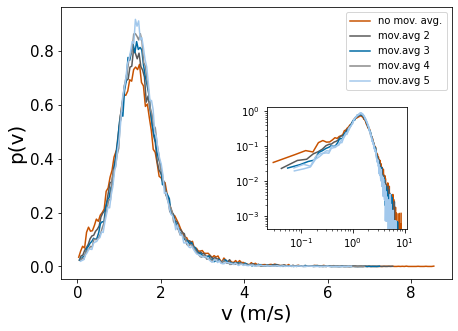

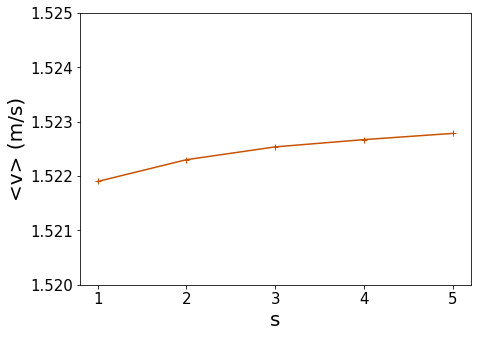

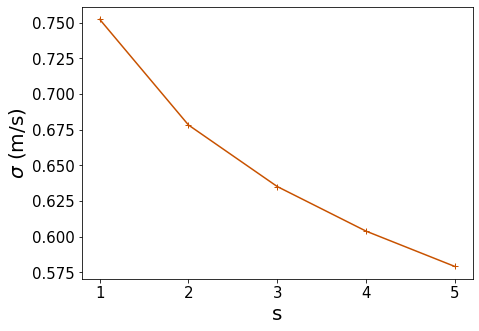

In [19]:
all_files = glob.glob(os.path.join("*.csv")) # Make list of paths (csv files for all individuals)

velocities=[]   # no moving average
v_avg2=[]   # moving average every 2,3,4 and 5 velocities
v_avg3=[]
v_avg4=[]
v_avg5=[]

for file in all_files:   # Loop over all csv files in the folder/directory   
    df = pd.read_csv(file)  # Read the csv file of each user
    df2=df.copy() 
    v=df2['v'][:-1].tolist()   # List of velocities (we remove the last element which is NaN)
    d=df2['d'][:-1].tolist()
    
    velocities.extend(v)      # We put the velocities of all users in a unique list (no moving average)
       
    velocities_avg2=[]
    for i in range(1,len(v)):     #moving average every two consecutive velocities for each user
        velocities_avg2.append((v[i-1]+v[i])/2.0)
    
    velocities_avg3=[]
    for j in range(1,len(v)-1):     #moving average every three consecutive velocities for each user
        velocities_avg3.append((v[j-1]+v[j]+v[j+1])/3.0)
     
    velocities_avg4=[]
    for k in range(1,len(v)-2):     #moving average every four consecutive velocities for each user
        velocities_avg4.append((v[k-1]+v[k]+v[k+1]+v[k+2])/4.0)

    velocities_avg5=[]
    for t in range(1,len(v)-3):     #moving average every five consecutive velocities for each user
        velocities_avg5.append((v[t-1]+v[t]+v[t+1]+v[t+2]+v[t+3])/5.0)
        
    v_avg2.extend(velocities_avg2)   # For each s=2,3,4,5 we put the averaged velocities for all users in a unique list
    v_avg3.extend(velocities_avg3)
    v_avg4.extend(velocities_avg4)
    v_avg5.extend(velocities_avg5)
    


    
# FOR EACH CASE, WE COMPUTE THE MEAN VALUE, THE VARIANCE, THE STANDARD DEVIATION, THE ERROR AND THE QUARTILES, AS WELL AS THE
# SMALLER AND THE GREATER VALUE. THEN WE PRINT THESE VALUES AND WE REPRESENT THE PDF FOR EACH CASE, IN AN UNIQUE FIGURE.

mean = sum(velocities) / len(velocities)
variance = sum([((x - mean) ** 2) for x in velocities]) / len(velocities)
res = variance ** 0.5
error=res/(len(velocities)**0.5)
#velocities.sort()
q1=np.quantile(velocities, 0.25)
q2=np.quantile(velocities, 0.50)
q3=np.quantile(velocities, 0.75)
print('No moving average')
print('<v>=',mean, '', 'std=',res, '', 'e=',error)
print('min v=',min(velocities),'', 'max v=',max(velocities))
print(len(velocities))
print('q1 (25%):',q1)
print('q2 (50%):',q2)
print('q3 (75%):',q3)

print('')
print('Moving average every 2 velocities')
mean2 = sum(v_avg2) / len(v_avg2)
variance2 = sum([((x2 - mean2) ** 2) for x2 in v_avg2]) / len(v_avg2)
res2 = variance2 ** 0.5
error2=res2/(len(v_avg2)**0.5)
#v_avg2.sort()
q1=np.quantile(v_avg2, 0.25)
q2=np.quantile(v_avg2, 0.50)
q3=np.quantile(v_avg2, 0.75)
print('<v>=',mean2, '', 'std=',res2, '', 'e=',error2)
print('min v=',min(v_avg2),'', 'max v=',max(v_avg2))
print(len(v_avg2))
print('q1 (25%):',q1)
print('q2 (50%):',q2)
print('q3 (75%):',q3)

print('')
print('Moving average every 3 velocities')
mean3 = sum(v_avg3) / len(v_avg3)
variance3 = sum([((x3 - mean3) ** 2) for x3 in v_avg3]) / len(v_avg3)
res3 = variance3 ** 0.5
error3=res3/(len(v_avg3)**0.5)
#v_avg3.sort()
q1=np.quantile(v_avg3, 0.25)
q2=np.quantile(v_avg3, 0.50)
q3=np.quantile(v_avg3, 0.75)
print('<v>=',mean3, '', 'std=',res3, '', 'e=',error3)
print('min v=',min(v_avg3),'', 'max v=',max(v_avg3))
print(len(v_avg3))
print('q1 (25%):',q1)
print('q2 (50%):',q2)
print('q3 (75%):',q3)

print('')
print('Moving average every 4 velocities')
mean4 = sum(v_avg4) / len(v_avg4)
variance4 = sum([((x4 - mean4) ** 2) for x4 in v_avg4]) / len(v_avg4)
res4 = variance4 ** 0.5
error4=res4/(len(v_avg4)**0.5)
#v_avg4.sort()
q1=np.quantile(v_avg4, 0.25)
q2=np.quantile(v_avg4, 0.50)
q3=np.quantile(v_avg4, 0.75)
print('<v>=',mean4, '', 'std=',res4, '', 'e=',error4)
print('min v=',min(v_avg4),'', 'max v=',max(v_avg4))
print(len(v_avg4))
print('q1 (25%):',q1)
print('q2 (50%):',q2)
print('q3 (75%):',q3)

print('')
print('Moving average every 5 velocities')
mean5 = sum(v_avg5) / len(v_avg5)
variance5 = sum([((x5 - mean5) ** 2) for x5 in v_avg5]) / len(v_avg5)
res5 = variance5 ** 0.5
error5=res5/(len(v_avg5)**0.5)
#v_avg5.sort()
q1=np.quantile(v_avg5, 0.25)
q2=np.quantile(v_avg5, 0.50)
q3=np.quantile(v_avg5, 0.75)
print('<v>=',mean5, '', 'std=',res5, '', 'e=',error5)
print('min v=',min(v_avg5),'', 'max v=',max(v_avg5))
print(len(v_avg5))
print('q1 (25%):',q1)
print('q2 (50%):',q2)
print('q3 (75%):',q3)

#['#006BA4', '#FF800E', '#ABABAB', '#595959', '#5F9ED1', '#C85200', '#898989', '#A2C8EC', '#FFBC79', '#CFCFCF']),
# PDF OF VELOCITIES. FOR EACH MOVING AVERAGE EVERY S=1,2,3,4,5 VELOCITIES.
fig, ax = plt.subplots(figsize=(7,5)) 
axins2 = inset_axes(ax, width="80%", height="100%", loc=1,bbox_to_anchor=(0.45,1-0.80,.45,.45), bbox_transform=ax.transAxes)

numpy_matrix = np.array(velocities)  #list to array
counts,bin_edges = np.histogram(numpy_matrix,'auto',density=True)   #frequences and bins
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.   #bins center
ax.plot(bin_centres, counts, '-', label='no mov. avg.', c='#C85200')    #plot pdf
axins2.plot(bin_centres, counts, '-', label='no mov. avg.', c='#C85200')    #plot pdf

numpy_matrix = np.array(v_avg2)  #list to array
counts,bin_edges = np.histogram(numpy_matrix,'auto',density=True)   #frequences and bins
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.   #bins center
ax.plot(bin_centres, counts, '-', label='mov.avg 2', c='#595959')    #plot pdf
axins2.plot(bin_centres, counts, '-', label='mov.avg 2', c='#595959')    #plot pdf

numpy_matrix = np.array(v_avg3)  #list to array
counts,bin_edges = np.histogram(numpy_matrix,'auto',density=True)   #frequences and bins
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.   #bins center
ax.plot(bin_centres, counts, '-', label='mov.avg 3', c='#006BA4')    #plot pdf
axins2.plot(bin_centres, counts, '-', label='mov.avg 3', c='#006BA4')    #plot pdf

numpy_matrix = np.array(v_avg4)  #list to array
counts,bin_edges = np.histogram(numpy_matrix,'auto',density=True)   #frequences and bins
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.   #bins center
ax.plot(bin_centres, counts, '-', label='mov.avg 4', c='#898989')    #plot pdf
axins2.plot(bin_centres, counts, '-', label='mov.avg 4',c='#A2C8EC')    #plot pdf

numpy_matrix = np.array(v_avg5)  #list to array
counts,bin_edges = np.histogram(numpy_matrix,'auto',density=True)   #frequences and bins
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.   #bins center
ax.plot(bin_centres, counts, '-', label='mov.avg 5', c='#A2C8EC')    #plot pdf
axins2.plot(bin_centres, counts, '-', label='mov.avg 5', c='#A2C8EC')    #plot pdf

#ax.set_yscale('log')
#ax.set_xscale('log')

ax.set_xlabel('v (m/s)',fontsize=20)
ax.set_ylabel('p(v)',fontsize=20)
ax.legend()

axins2.set_yscale('log',basey=10)
axins2.set_xscale('log',basex=10)
ax.tick_params(labelsize=15)


#fig.savefig('pdf_v_average_mobile.pdf',format='pdf', bbox_inches='tight')

plt.show()   


v_averages=[mean,mean2,mean3,mean4,mean5]
std_averages=[res,res2,res3,res4,res5]
s=[1,2,3,4,5]




# Plot mean value and standard deviation as a function s (the parameter controling the average)
fig, ax = plt.subplots(figsize=(7,5)) 

ax.plot(s,v_averages,'+-', c='#C85200')
ax.set_xlabel('s',fontsize=20)
ax.set_ylabel('<v> (m/s)',fontsize=20)
ax.set_ylim(1.52,1.525)
ax.tick_params(labelsize=15)

#fig.savefig('mean_v_average_mobile.pdf',format='pdf', bbox_inches='tight')

plt.show()



fig, ax = plt.subplots(figsize=(7,5)) 

ax.plot(s,std_averages,'+-', c='#C85200')
ax.set_xlabel('s',fontsize=20)
ax.set_ylabel(r'$\sigma$ (m/s)',fontsize=20)
ax.tick_params(labelsize=15)

#fig.savefig('std_v_average_mobile.pdf',format='pdf', bbox_inches='tight')

plt.show()


# 4. MOVING AVERAGE MOBILE

We repeat the above procedure but now computing the distances and velocities between GPS locations separated every s=1,2,3,4... points.

In other words, if s=1, we simply obtain the distances and velocities of consecutive points.

If s=2, we calculate the At, distance and velocity between the points in the locations 2 and 0, then between 3 and 1, then between 4 and 2... and so. That is:

$\Delta t = \left[ t_{2}-t_{0},  t_{3}-t_{1},..., t_{N}-t_{N-2} \right]$

$d = \left[ d_{2,0}, d_{3,1},..., d_{N,N-2} \right]$

$v= \left[ \frac{d_{2,0}}{t_{2}-t_{0}},  \frac{d_{3,1}}{t_{3}-t_{1}},..., \frac{d_{N,N-2}}{t_{N}-t_{N-2}} \right]$

If s=3, At, d and v between the points at locations 3 and 0, 4 and 1, 5 and 2... and so.



s= 1
nº GPS locs. 36008
<v>= 1.5219009997850186   std= 0.7523192312888785 error= 0.003964630007391487
v min= 0.005756708277263974   v max= 8.566491492517326
Q1 (25%): 1.0693516215124534 m/s
Q2 (50%): 1.4360491098720187 m/s
Q3 (75%): 1.8501581295809548 m/s


s= 2
nº GPS locs. 35925
<v>= 1.476766647105455   std= 0.6777267565873943 error= 0.0035756602247684955
v min= 0.0032970826826994116   v max= 7.577430947017444
Q1 (25%): 1.069626552386285 m/s
Q2 (50%): 1.4172286635501388 m/s
Q3 (75%): 1.7882094946621077 m/s


s= 3
nº GPS locs. 35842
<v>= 1.4508859977436035   std= 0.6349375599568557 error= 0.0033537825515613487
v min= 0.011524343494786834   v max= 7.256422229713234
Q1 (25%): 1.07445778282209 m/s
Q2 (50%): 1.408550903858509 m/s
Q3 (75%): 1.7579493062679439 m/s


s= 4
nº GPS locs. 35759
<v>= 1.431711250001648   std= 0.6032986940573266 error= 0.0031903600808426058
v min= 0.003690054631043472   v max= 6.714184410078783
Q1 (25%): 1.07468229750396 m/s
Q2 (50%): 1.3992633306734257 m/s
Q3 (75%

<ipython-input-33-74ef4c7c4252>:151: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins1.set_yscale('log',basey=10)
<ipython-input-33-74ef4c7c4252>:152: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins1.set_xscale('log',basex=10)
<ipython-input-33-74ef4c7c4252>:158: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_yscale('log',basey=10)
<ipython-input-33-74ef4c7c4252>:159: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_xscale('log',ba

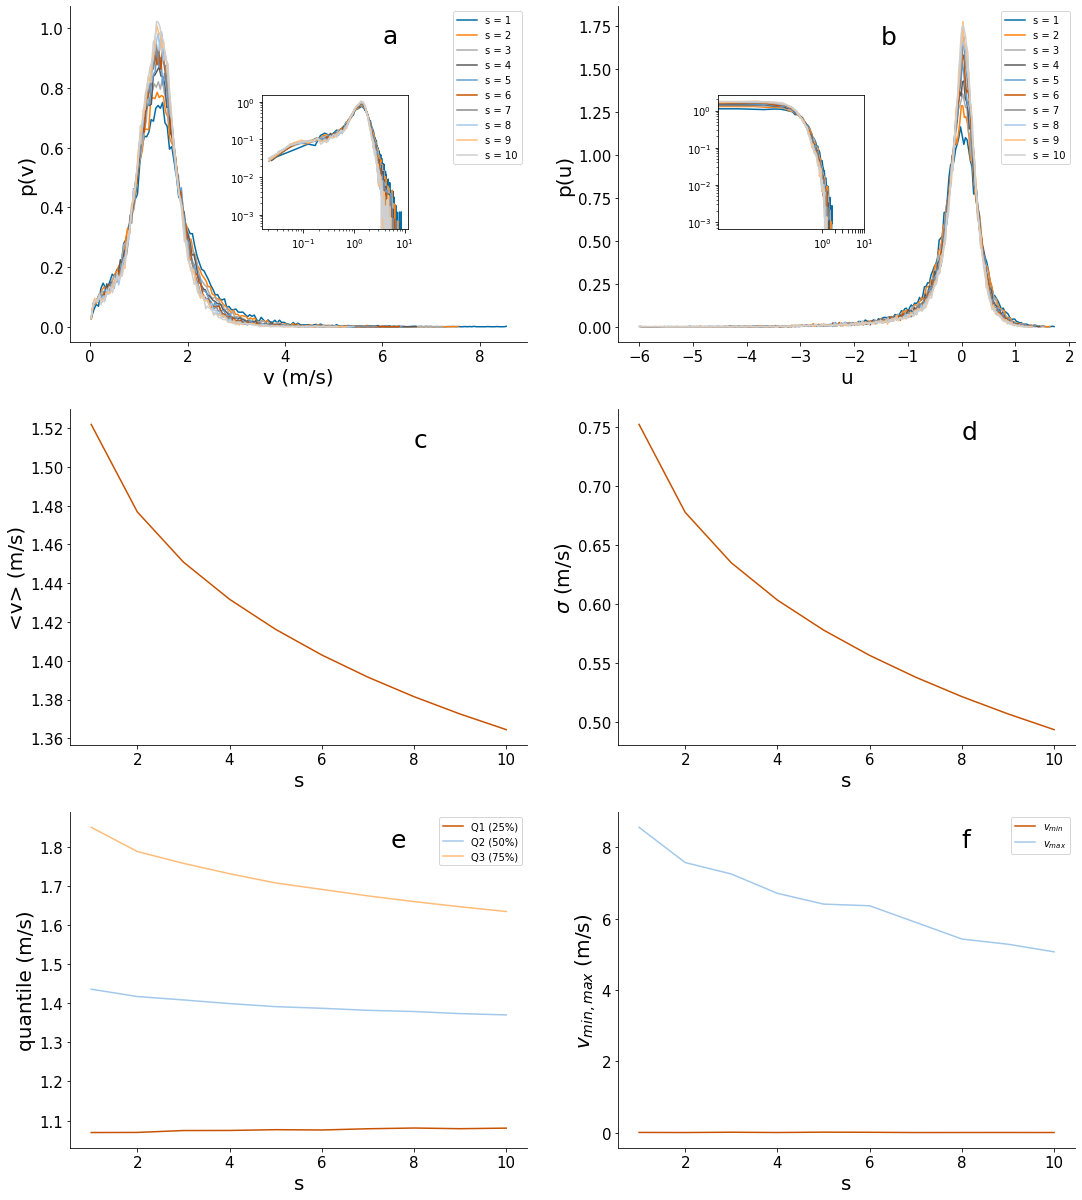

In [33]:
fig = plt.figure(figsize=(18, 21))
gs = fig.add_gridspec(nrows=3, ncols=2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[2, 0])
ax6 = fig.add_subplot(gs[2, 1])

axins1 = inset_axes(ax1, width="80%", height="100%", loc=1,bbox_to_anchor=(0.35,1-0.65,.40,.40), bbox_transform=ax1.transAxes)
axins2 = inset_axes(ax2, width="80%", height="100%", loc=1,bbox_to_anchor=(0.15,1-0.65,.40,.40), bbox_transform=ax2.transAxes)

ax1.spines["top"].set_visible(False)    
ax1.spines["bottom"].set_visible(True)    
ax1.spines["right"].set_visible(False)    
ax1.spines["left"].set_visible(True)

ax2.spines["top"].set_visible(False)    
ax2.spines["bottom"].set_visible(True)    
ax2.spines["right"].set_visible(False)    
ax2.spines["left"].set_visible(True)

ax3.spines["top"].set_visible(False)    
ax3.spines["bottom"].set_visible(True)    
ax3.spines["right"].set_visible(False)    
ax3.spines["left"].set_visible(True)

ax4.spines["top"].set_visible(False)    
ax4.spines["bottom"].set_visible(True)    
ax4.spines["right"].set_visible(False)    
ax4.spines["left"].set_visible(True)

ax5.spines["top"].set_visible(False)    
ax5.spines["bottom"].set_visible(True)    
ax5.spines["right"].set_visible(False)    
ax5.spines["left"].set_visible(True)

ax6.spines["top"].set_visible(False)    
ax6.spines["bottom"].set_visible(True)    
ax6.spines["right"].set_visible(False)    
ax6.spines["left"].set_visible(True)

ax1.text(6, 0.95, 'a', fontsize = 25)
ax2.text(-1.5, 1.65, 'b', fontsize = 25)
ax3.text(8, 1.51, 'c', fontsize = 25)
ax4.text(8, 0.74, 'd', fontsize = 25)
ax5.text(7.5, 1.8, 'e', fontsize = 25)
ax6.text(8, 8, 'f', fontsize = 25)


all_files = glob.glob(os.path.join("*.csv")) # Make list of paths (csv files for all individuals)


colors=['#006BA4', '#FF800E', '#ABABAB', '#595959', '#5F9ED1', '#C85200', '#898989', '#A2C8EC', '#FFBC79', '#CFCFCF']

llista=[0,1,2,3,4,5,6,7,8,9]
average_v_s=[]
std_v_s=[]
stds=[]
quantile1=[]
quantile2=[]
quantile3=[]
v_min=[]
v_max=[]
for s in llista:
    v=[]
    u=[]
    for file in all_files:   # Loop over all csv files in the folder/directory   
        df = pd.read_csv(file)  # Read the csv file of each user
        df2=df.copy() 

        if 'index' in df2:   # if the file has the column index, delete it
            del df2['index']

        df2['time'] = pd.to_datetime(df2['time'])   # Time to datetime format

    
        # We calculate the time difference and the distance every "s" points (timesteps). So if s=1 we obtain the At/dist/vel. every
        # timestep (i.e. consecutive). If s=2, we calculate the differece between points separated 2 steps (t2-t0, t3-t1,...) and so
        At=[]
        distance=[]
        for i in range(1,len(df2['time'])-s):
            At.append((df2['time'][i+s]-df2['time'][i-1]).total_seconds())
            dist=getDistanceFromLatLonInM(df2['latitude'][i-1],df2['longitude'][i-1],df2['latitude'][i+s],df2['longitude'][i+s])
            distance.append(dist)
            
        for ii in range(s+1):   # We must insert as many NaN values in the end as we increase s (to insert into the dataframe)
            At.insert(len(At), np.nan)
            distance.insert(len(distance), np.nan)
    

        df2['At']=At                # Insert the columns into the dataframe, calculate v (same as d if At=1s.)
        df2['d']=distance           # Then get a list of non NaN velocities, and obtain the mean value and the pdf for each s
        df2['v']=df2['d']/df2['At']

        
        vel=df2['v'][~df2['v'].isnull()].tolist()
        
        mean_v=sum(vel)/len(vel)
        uu=[]
        for j in range(len(vel)):
            uu.append(np.log(vel[j]/mean_v))
        
        v.extend(vel)
        u.extend(uu)
        
    mean = sum(v) / len(v)
    variance = sum([((x - mean) ** 2) for x in v]) / len(v)
    res = variance ** 0.5
    error=res/(len(v)**0.5)
   
    print('s=',s+1)
    print('nº GPS locs.',len(v))
    print('<v>=', mean, '','', 'std=',res, 'error=',error)
    print('v min=', min(v), '','', 'v max=',max(v))
    q1=np.quantile(v, 0.25)
    q2=np.quantile(v, 0.50)
    q3=np.quantile(v, 0.75)
    print('Q1 (25%):',q1, 'm/s')
    print('Q2 (50%):',q2, 'm/s')
    print('Q3 (75%):',q3, 'm/s')
    print('')
    print('')
    
    quantile1.append(q1)
    quantile2.append(q2)
    quantile3.append(q3)
    
    v_min.append(min(v))
    v_max.append(max(v))

    numpy_matrix = np.array(v)  #list to array
    counts,bin_edges = np.histogram(numpy_matrix,'auto',density=True)   #frequences and bins
    bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.   #bins center
    ax1.plot(bin_centres, counts, '-', c=colors[s],label=f's = {s+1}')    #plot pdf
    axins1.plot(bin_centres, counts, '-',c=colors[s], label=f's = {s+1}')    #plot pdf
      
    average_v_s.append(mean) # Save the <v> for each s (average over all users and all points)
    std_v_s.append(error)
    stds.append(res)
    
    numpy_matrix2 = np.array(u)  #list to array
    counts2,bin_edges2 = np.histogram(numpy_matrix2,'auto',density=True)   #frequences and bins
    bin_centres2 = (bin_edges2[:-1] + bin_edges2[1:])/2.   #bins center
    ax2.plot(bin_centres2, counts2, '-',c=colors[s], label=f's = {s+1}')    #plot pdf
    axins2.plot(bin_centres2, counts2, '-',c=colors[s], label=f's = {s+1}')    #plot pdf


ax1.set_xlabel('v (m/s)',fontsize=20)
ax1.set_ylabel('p(v)',fontsize=20)
axins1.set_yscale('log',basey=10)
axins1.set_xscale('log',basex=10)
ax1.tick_params(labelsize=15)
ax1.legend(loc='upper right')

ax2.set_xlabel('u',fontsize=20)
ax2.set_ylabel('p(u)',fontsize=20)
axins2.set_yscale('log',basey=10)
axins2.set_xscale('log',basex=10)
ax2.tick_params(labelsize=15)
ax2.legend(loc='upper right')

s=[1,2,3,4,5,6,7,8,9,10]
ax3.plot(s,average_v_s, '-',c='#C85200',label='v')
ax3.set_xlabel('s', fontsize=20)
ax3.set_ylabel('<v> (m/s)', fontsize=20)
ax3.tick_params(labelsize=15)
plt.xticks([1,2,3,4,5,6,7,8,9,10])
 
ax4.plot(s,stds, '-',c='#C85200',label='v')
ax4.set_xlabel('s', fontsize=20)
ax4.set_ylabel(r'$\sigma$ (m/s)', fontsize=20)
ax4.tick_params(labelsize=15)
plt.xticks([1,2,3,4,5,6,7,8,9,10])

ax5.plot(s,quantile1, '-',c='#C85200',label='Q1 (25%)')  
ax5.plot(s,quantile2, '-',c='#A2C8EC',label='Q2 (50%)')
ax5.plot(s,quantile3, '-',c='#FFBC79',label='Q3 (75%)')
ax5.set_xlabel('s', fontsize=20)
ax5.set_ylabel('quantile (m/s)', fontsize=20)
ax5.tick_params(labelsize=15)
plt.xticks([1,2,3,4,5,6,7,8,9,10])
ax5.legend()
 
ax6.plot(s,v_min, '-',c='#C85200',label=r'$v_{min}$')
ax6.plot(s,v_max, '-',c='#A2C8EC',label=r'$v_{max}$')
ax6.set_xlabel('s', fontsize=20)
ax6.set_ylabel(r'$v_{min,max}$ (m/s)', fontsize=20)
ax6.tick_params(labelsize=15)
plt.xticks([1,2,3,4,5,6,7,8,9,10])
ax6.legend()
#ax.set_ylim(0,0.02)


#plt.savefig('moving_average.pdf',format='pdf', bbox_inches='tight')

plt.show()


# 5. Linear interpolation
        
## 5.1. Pdf velocities comparision

Interpolated Data

nº GPS locs. 44579
<v>= 1.4248610369042611 +- 0.003562489946930262   std= 0.7521748507582595
v min= 0.005756708134318524   v max= 8.566491492517326


Original Data

nº GPS locs. 36008
<v>= 1.5219009997850155 +- 0.003964630007391514   std= 0.7523192312888836
v min= 0.0057567082772639   v max= 8.566491492517326




<ipython-input-4-9bb46c91e4a3>:118: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_yscale('log',basey=10)
<ipython-input-4-9bb46c91e4a3>:119: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_xscale('log',basex=10)


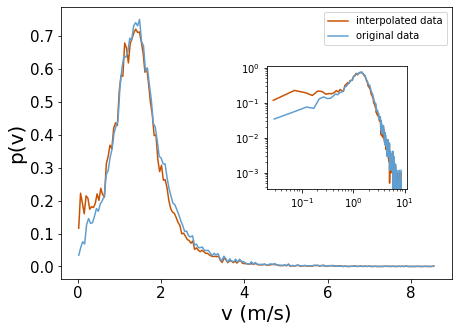

FIT PARAMETRES
Interpolated Data:

mu= 1.4786593478943624 +- 0.008496511746601433
sigma= 0.4066790401871524 +- 0.004938533511613442


Original Data:

mu= 1.5074841440756204 +- 0.006571826462383969
sigma= 0.3911785144603298 +- 0.0037456896286422337


<ipython-input-4-9bb46c91e4a3>:170: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_yscale('log',basey=10)
<ipython-input-4-9bb46c91e4a3>:171: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_xscale('log',basex=10)


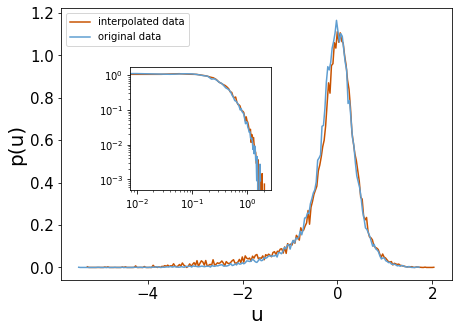

FIT PARAMETRES

Interpolated Data:

mu= 0.011546240308078584 +- 0.008550441315923842
sigma= 0.3742435300514213 +- 0.006969068498183465


Original Data:

mu= -0.01214869489815447 +- 0.006186397766482012
sigma= 0.35850308577005563 +- 0.005120936430384332


In [4]:
all_files = glob.glob(os.path.join("*.csv")) # Make list of paths (csv files for all individuals)


v_interpolated=[]
v_original=[]
u_interpolated=[]
u_original=[]

for file in all_files:   # Loop over all csv files in the folder/directory   
    df = pd.read_csv(file)  # Read the csv file of each user
    df2=df.copy() 
    
    # LINEAR INTERPOLATION
    if 'index' in df2:
        del df2['index']

    df2['time'] = pd.to_datetime(df2['time'])   # Column time as index
    df2.index = df2['time']
    del df2['time']


    vvv=df2['v'][:-1].tolist() 
    v_original.extend(vvv)   # All original velocities
    
    uuu=[]
    mean_v_origin=sum(vvv)/len(vvv)         # logarithm of velocities:  u=ln(v/<v>)
    for i in range(len(vvv)):
        uuu.append(np.log(vvv[i]/mean_v_origin))
    u_original.extend(uuu)

    del df2['nickname']   # Delete all columns less latitude and longitude
    del df2['At']
    del df2['d']
    del df2['v']

    df2=df2.resample('1S').asfreq().interpolate()   # Interpolate every 1 second (predict latitude and longitude)

    df2.reset_index(level=0, inplace=True)  # Reset index

    # Recalculate the time differences (now are 1 second in the whole dataset), the distances and the velocities.
    At=[]
    distance=[]
    for i in range(1,len(df2['time'])):
        At.append((df2['time'][i]-df2['time'][i-1]).total_seconds())
        dist=getDistanceFromLatLonInM(df2['latitude'][i-1],df2['longitude'][i-1],df2['latitude'][i],df2['longitude'][i])
        distance.append(dist)

    At.insert(len(At), np.nan)
    distance.insert(len(distance), np.nan)   # Insert NaN value at the end of the column in order to add to the data-frame

    # New columns time difference, distance and instantaneous velocity with interpolated data
    df2['At']=At
    df2['d']=distance
    df2['v']=df2['d']/df2['At']

    vel=df2['v'][~df2['v'].isnull()].tolist()    
    v_interpolated.extend(vel)   # All non-NaN velocities after interpolation
    
    vel=df2['v'][:-1].tolist()      
    mean_v=sum(vel)/(len(vel))    # logarithm of v (u=ln(v/<v>)) after interpolation
    u=[]
    for i in range(len(vel)):
        u.append(np.log(vel[i]/mean_v))    
    u_interpolated.extend(u)

    
    
# INTERPOLATED DATA
print('Interpolated Data')
print('')
mean = sum(v_interpolated) / len(v_interpolated)
variance = sum([((x - mean) ** 2) for x in v_interpolated]) / len(v_interpolated)
res = variance ** 0.5
error=res/(len(v_interpolated)**0.5)
print('nº GPS locs.',len(v_interpolated))
print('<v>=', mean, '+-',error, ' ', 'std=',res)
print('v min=', min(v_interpolated), '','', 'v max=',max(v_interpolated))
print('')
print('')

# ORIGINAL DATA
print('Original Data')
print('')
mean = sum(v_original) / len(v_original)
variance = sum([((x - mean) ** 2) for x in v_original]) / len(v_original)
res = variance ** 0.5
error=res/(len(v_original)**0.5)
print('nº GPS locs.',len(v_original))
print('<v>=', mean, '+-',error, ' ', 'std=',res)
print('v min=', min(v_original), '','', 'v max=',max(v_original))
print('')
print('')



# PLOT PDF V AND FIT

fig, ax = plt.subplots(figsize=(7,5)) 
axins2 = inset_axes(ax, width="80%", height="100%", loc=1,bbox_to_anchor=(0.45,1-0.65,.45,.45), bbox_transform=ax.transAxes)


# PDF interpolated velocities v
numpy_matrix = np.array(v_interpolated)  #list to array
counts,bin_edges = np.histogram(numpy_matrix,'auto',density=True)   #frequences and bins
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.   #bins center
ax.plot(bin_centres, counts, '-', c='#C85200',label='interpolated data')    #plot pdf
axins2.plot(bin_centres, counts, '-', c='#C85200',label='interpolated data')    #plot pdf

# PDF original velocities v
numpy_matrix2 = np.array(v_original)  #list to array
counts2,bin_edges2= np.histogram(numpy_matrix2,'auto',density=True)   #frequences and bins
bin_centres2 = (bin_edges2[:-1] + bin_edges2[1:])/2.   #bins center
ax.plot(bin_centres2, counts2, '-', c='#5F9ED1', label='original data')    #plot pdf
axins2.plot(bin_centres2, counts2, '-', c='#5F9ED1', label='original data')    #plot pdf

ax.set_xlabel('v (m/s)',fontsize=20)
ax.set_ylabel('p(v)',fontsize=20)
axins2.set_yscale('log',basey=10)
axins2.set_xscale('log',basex=10)
ax.tick_params(labelsize=15)
ax.legend(loc='upper right')
plt.show()


#LOG-NORMAL FIT
popt, pcov = curve_fit(lognormal, bin_centres[15:], counts[15:], p0=(1,1))
times = np.arange(bin_centres[15], bin_centres[-1], 0.01)
model = lognormal(times, *popt)
perr = np.sqrt(np.diag(pcov))  #error parameter

popt2, pcov2 = curve_fit(lognormal, bin_centres2[15:], counts2[15:], p0=(1,1))
times2 = np.arange(bin_centres2[15], bin_centres2[-1], 0.01)
model2 = lognormal(times2, *popt2)
perr2 = np.sqrt(np.diag(pcov2))  #error parameter

print('FIT PARAMETRES')
print('Interpolated Data:')
print('')
print('mu=', popt[1], '+-', perr[1])
print('sigma=', popt[0], '+-', perr[0])
print('')
print('')
print('Original Data:')
print('')
print('mu=', popt2[1], '+-', perr2[1])
print('sigma=', popt2[0], '+-', perr2[0])




# PLOT PDF U AND FIT

fig, ax = plt.subplots(figsize=(7,5)) 
axins2 = inset_axes(ax, width="80%", height="100%", loc=1,bbox_to_anchor=(0.10,1-0.65,.45,.45), bbox_transform=ax.transAxes)

numpy_matrix = np.array(u_interpolated)  #list to array
counts,bin_edges = np.histogram(numpy_matrix,'auto',density=True)   #frequences and bins
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.   #bins center
ax.plot(bin_centres, counts, '-', c='#C85200',label='interpolated data')    #plot pdf
axins2.plot(bin_centres, counts, '-', c='#C85200',label='interpolated data')    #plot pdf

numpy_matrix2 = np.array(u_original)  #list to array
counts2,bin_edges2= np.histogram(numpy_matrix2,'auto',density=True)   #frequences and bins
bin_centres2 = (bin_edges2[:-1] + bin_edges2[1:])/2.   #bins center
ax.plot(bin_centres2, counts2, '-',c='#5F9ED1',label='original data')    #plot pdf
axins2.plot(bin_centres2, counts2, '-', c='#5F9ED1', label='original data')    #plot pdf

ax.set_xlabel('u',fontsize=20)
ax.set_ylabel('p(u)',fontsize=20)
axins2.set_yscale('log',basey=10)
axins2.set_xscale('log',basex=10)
ax.tick_params(labelsize=15)
ax.legend(loc='upper left')
plt.show()


# NORMAL FIT
popt, pcov = curve_fit(normal, bin_centres[155:], counts[155:], p0=(1,1))
times = np.arange(bin_centres[155], bin_centres[-1], 0.01)
model = normal(times, *popt)
perr = np.sqrt(np.diag(pcov))  #calcul error del parametre

popt2, pcov2 = curve_fit(normal, bin_centres2[155:], counts2[155:], p0=(1,1))
times2 = np.arange(bin_centres2[155], bin_centres2[-1], 0.01)
model2 = normal(times2, *popt2)
perr2 = np.sqrt(np.diag(pcov2))  #calcul error del parametre

print('FIT PARAMETRES')
print('')
print('Interpolated Data:')
print('')
print('mu=', popt[1], '+-', perr[1])
print('sigma=', popt[0], '+-', perr[0])
print('')
print('')
print('Original Data:')
print('')
print('mu=', popt2[1], '+-', perr2[1])
print('sigma=', popt2[0], '+-', perr2[0])


## 5.2. Individual PDF interpolated data

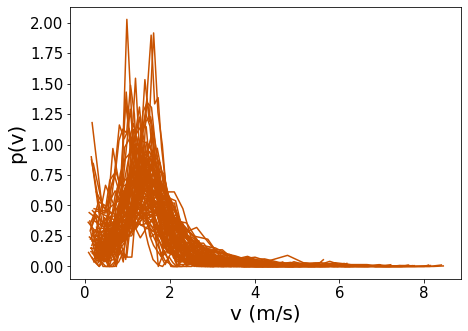

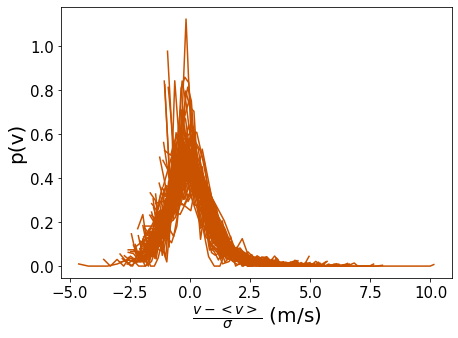

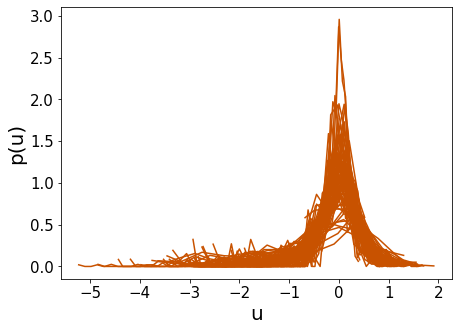

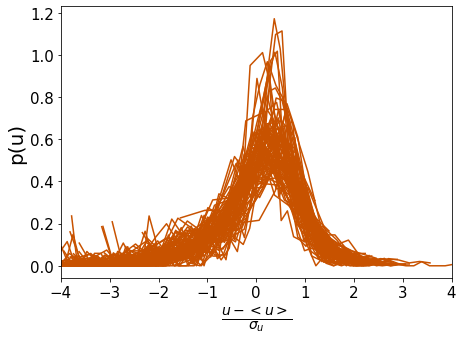

In [6]:
all_files = glob.glob(os.path.join("*.csv")) # Make list of paths (csv files for all individuals)


fig, ax = plt.subplots(figsize=(7,5)) 
fig, ax2 = plt.subplots(figsize=(7,5)) 
fig, ax3 = plt.subplots(figsize=(7,5)) 
fig, ax4 = plt.subplots(figsize=(7,5)) 


for file in all_files:   # Loop over all csv files in the folder/directory 
    df = pd.read_csv(file)  # Read the csv file of each user
    df2=df.copy() 

    
    # Linear Interpolation
    if 'index' in df2:
        del df2['index']

    df2['time'] = pd.to_datetime(df2['time'])  # Time to index, then delete the rest of the columns (less coordinates)
    df2.index = df2['time']
    del df2['time']

    vv=df2['v'].tolist()
    vvv=df2['v'][:-1].tolist()

    del df2['nickname']
    del df2['At']
    del df2['d']
    del df2['v']

    df2=df2.resample('1S').asfreq().interpolate()  # Interpolate and reset index
    df2.reset_index(level=0, inplace=True)

    # Recalculate time diff, distances and velocities after interpolation
    At=[]
    distance=[]
    for i in range(1,len(df2['time'])):
        At.append((df2['time'][i]-df2['time'][i-1]).total_seconds())
        dist=getDistanceFromLatLonInM(df2['latitude'][i-1],df2['longitude'][i-1],df2['latitude'][i],df2['longitude'][i])
        distance.append(dist)

    At.insert(len(At), np.nan)
    distance.insert(len(distance), np.nan)  # Add NaN value at the end of the column in order to insert into the data-frame

    df2['At']=At
    df2['d']=distance
    df2['v']=df2['d']/df2['At']   # At, d and v as columns of the data-frame
    
    v=df2['v'][:-1].tolist()   # List of velocities and list of distances (we remove the last element which is NaN)

    mean = sum(v) / len(v)
    variance = sum([((x - mean) ** 2) for x in v]) / len(v)
    res = variance ** 0.5

    v2=[]
    u=[]
    for i in range(len(v)):
        v2.append((v[i]-mean)/res)        # v2 is the velocity v rescaled to have zero mean and unit variance
        u.append(np.log(v[i]/mean))       # u is just the logarithm of v  (u=ln(v/<v>))
        
    u2=[]
    mean_u=sum(u)/len(u)
    variance_u = sum([((x_u- mean_u) ** 2) for x_u in u]) / len(u)
    res_u = variance_u ** 0.5
    for ii in range(len(u)):
        u2.append((u[ii]-mean_u)/res_u)     # u2 is the rescaled u to have zero mean and unit variance 
        
        
        
    
    # PDf's four cases with interpolated data:
        # 1. velocities v
        # 2. rescaled velocities v2
        # 3. velocities u (logarithm)
        # 4. rescaled velocities u2 (logarithm + rescaled)
        
    numpy_matrix = np.array(v)  #list to array
    counts,bin_edges = np.histogram(numpy_matrix,'auto',density=True)   #frequences and bins
    bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.   #bins center
    ax.plot(bin_centres, counts, '-', c='#C85200')    #plot pdf
    
    numpy_matrix2 = np.array(v2)  #list to array
    counts2,bin_edges2 = np.histogram(numpy_matrix2,'auto',density=True)   #frequences and bins
    bin_centres2 = (bin_edges2[:-1] + bin_edges2[1:])/2.   #bins center
    ax2.plot(bin_centres2, counts2, '-', c='#C85200')    #plot pdf
    
    numpy_matrix3 = np.array(u)  #list to array
    counts3,bin_edges3 = np.histogram(numpy_matrix3,'auto',density=True)   #frequences and bins
    bin_centres3 = (bin_edges3[:-1] + bin_edges3[1:])/2.   #bins center
    ax3.plot(bin_centres3, counts3, '-',c='#C85200')    #plot pdf
    
    numpy_matrix4 = np.array(u2)  #list to array
    counts4,bin_edges4 = np.histogram(numpy_matrix4,'auto',density=True)   #frequences and bins
    bin_centres4 = (bin_edges4[:-1] + bin_edges4[1:])/2.   #bins center
    ax4.plot(bin_centres4, counts4, '-', c='#C85200')    #plot pdf
    
    
ax.set_xlabel('v (m/s)',fontsize=20)
ax.set_ylabel('p(v)',fontsize=20)
ax.tick_params(labelsize=15)

ax2.set_xlabel(r'$\frac{v-<v>}{\sigma}$ (m/s)',fontsize=20)
ax2.set_ylabel('p(v)',fontsize=20)
ax2.tick_params(labelsize=15)

ax3.set_xlabel('u',fontsize=20)
ax3.set_ylabel('p(u)',fontsize=20)
ax3.tick_params(labelsize=15)

ax4.set_xlabel(r'$\frac{u-<u>}{\sigma_u}$',fontsize=20)
ax4.set_ylabel('p(u)',fontsize=20)
ax4.tick_params(labelsize=15)
ax4.set_xlim(-4,4)

plt.show()   